In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
data=pd.read_csv("/content/Mall_Customers.csv")
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [21]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [22]:
data.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [23]:
data.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [24]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [25]:
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40
...,...,...,...,...,...
195,196,1,35,120,79
196,197,1,45,126,28
197,198,0,32,126,74
198,199,0,32,137,18


In [26]:
data.describe()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.560000,38.850000,60.560000,50.200000
std,57.879185,0.497633,13.969007,26.264721,25.823522
min,1.000000,0.000000,18.000000,15.000000,1.000000
25%,50.750000,0.000000,28.750000,41.500000,34.750000
50%,100.500000,1.000000,36.000000,61.500000,50.000000
75%,150.250000,1.000000,49.000000,78.000000,73.000000
max,200.000000,1.000000,70.000000,137.000000,99.000000


<Axes: ylabel='Gender'>

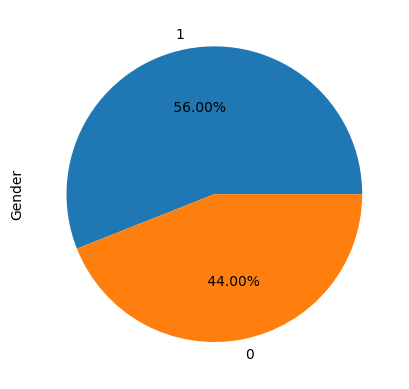

In [27]:
data['Gender'].value_counts().plot(kind='pie',autopct='% .2f%%')

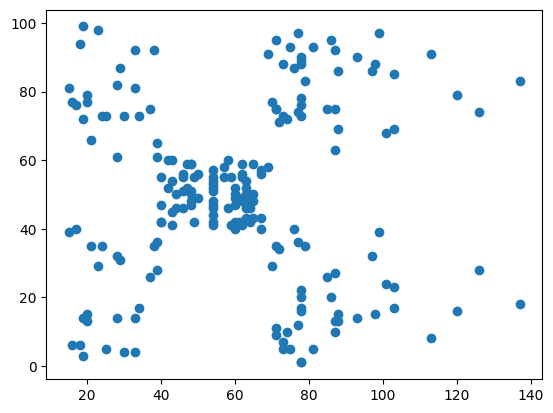

In [28]:
plt.scatter(data['Annual Income (k$)'],data['Spending Score (1-100)'])

<BarContainer object of 200 artists>

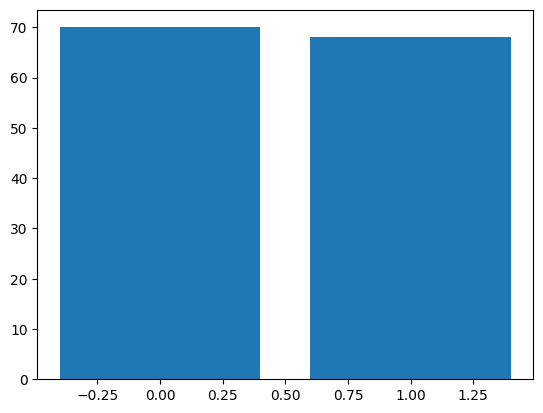

In [34]:
plt.bar(data['Gender'], data['Age'])  # Replace 'count' with the actual column name for the number of customers


<Axes: xlabel='Gender', ylabel='Age'>

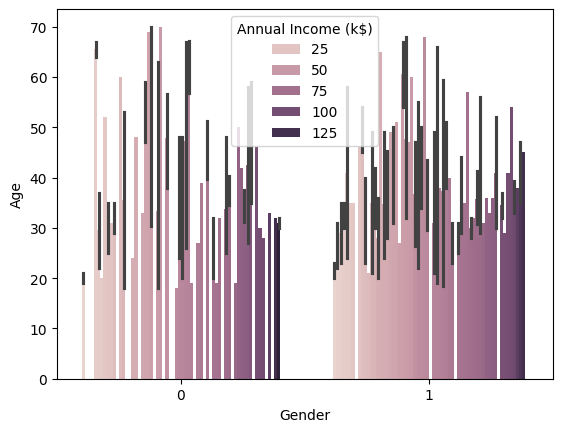

In [36]:
import seaborn as sns

sns.barplot(x='Gender', y='Age', hue='Annual Income (k$)', data=data)


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

In [ ]:
#a. Extract the variables “CustomerID”,”Genre”,”Age”,”Annual Income”
X = data[['CustomerID','Gender','Age','Annual Income (k$)','Spending Score (1-100)']].values
X

array([[  1,   0,  19,  15,  39],
       [  2,   0,  21,  15,  81],
       [  3,   1,  20,  16,   6],
       [  4,   1,  23,  16,  77],
       [  5,   1,  31,  17,  40],
       [  6,   1,  22,  17,  76],
       [  7,   1,  35,  18,   6],
       [  8,   1,  23,  18,  94],
       [  9,   0,  64,  19,   3],
       [ 10,   1,  30,  19,  72],
       [ 11,   0,  67,  19,  14],
       [ 12,   1,  35,  19,  99],
       [ 13,   1,  58,  20,  15],
       [ 14,   1,  24,  20,  77],
       [ 15,   0,  37,  20,  13],
       [ 16,   0,  22,  20,  79],
       [ 17,   1,  35,  21,  35],
       [ 18,   0,  20,  21,  66],
       [ 19,   0,  52,  23,  29],
       [ 20,   1,  35,  23,  98],
       [ 21,   0,  35,  24,  35],
       [ 22,   0,  25,  24,  73],
       [ 23,   1,  46,  25,   5],
       [ 24,   0,  31,  25,  73],
       [ 25,   1,  54,  28,  14],
       [ 26,   0,  29,  28,  82],
       [ 27,   1,  45,  28,  32],
       [ 28,   0,  35,  28,  61],
       [ 29,   1,  40,  29,  31],
       [ 30,  

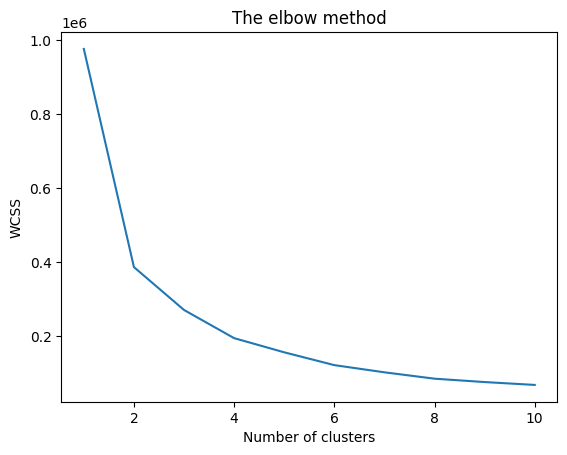

In [ ]:
#b. Find the optimal value of K with the elbow method.

wcss = []
for i in range(1, 11):
        kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init=10, random_state = 0)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [ ]:
#c. Perform the K-means clustering with optimal K.
kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init =10,random_state = 0)
y_kmeans = kmeans.fit_predict(X)
data["cluster"] = y_kmeans

In [ ]:
#d. Validate the performance of the classifier using Silhouette Score and Davies-Bouldin Index
y_kmeans.reshape(-1,1)
sc=silhouette_score(X,y_kmeans)
ds=davies_bouldin_score(X,y_kmeans)
print(sc,ds)

0.4793049017423563 0.7658511809766984


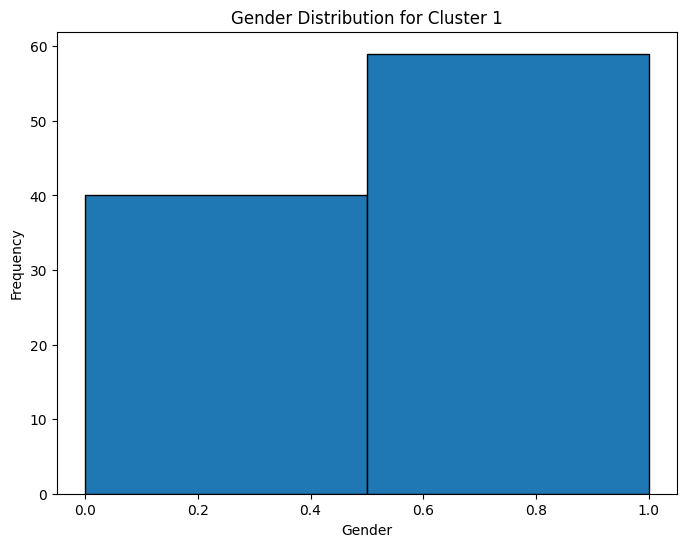

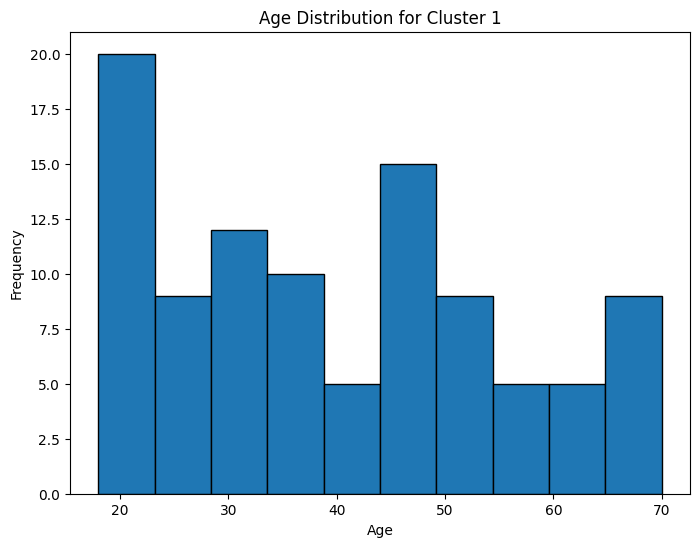

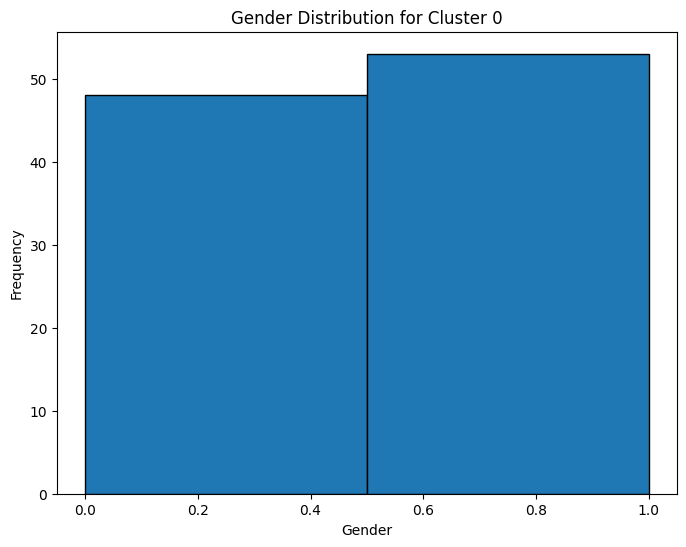

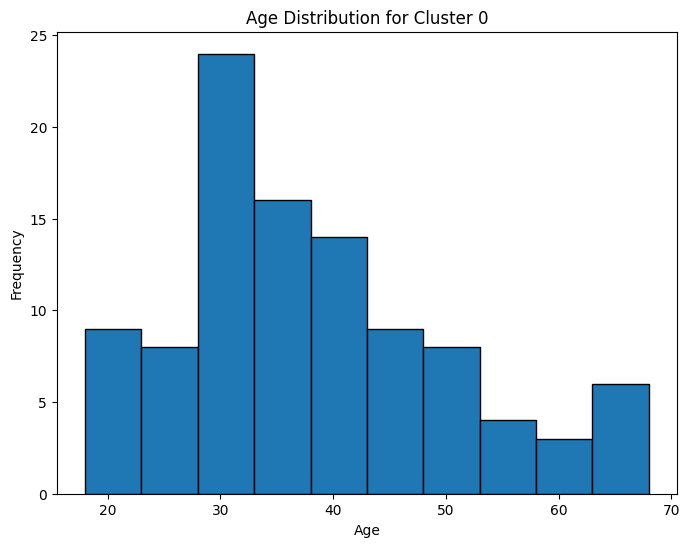

In [ ]:
# Create separate plots for each cluster
for cluster_id in data["cluster"].unique():
    cluster_data = data[data["cluster"] == cluster_id]
    plt.figure(figsize=(8, 6))
    plt.hist(cluster_data["Gender"], bins=2, edgecolor="black")
    plt.title(f"Gender Distribution for Cluster {cluster_id}")
    plt.xlabel("Gender")
    plt.ylabel("Frequency")
    plt.show()

    plt.figure(figsize=(8, 6))
    plt.hist(cluster_data["Age"], edgecolor="black")
    plt.title(f"Age Distribution for Cluster {cluster_id}")
    plt.xlabel("Age")
    plt.ylabel("Frequency")
    plt.show()

In [ ]:
# Calculate summary statistics for annual income and spending score within each cluster
for cluster_id in data["cluster"].unique():
    cluster_data = data[data["cluster"] == cluster_id]
    print(f"Cluster {cluster_id}:")

    # Annual Income
    print(f"  - Annual Income:")
    print(f"    - Mean = {cluster_data['Annual Income (k$)'].mean()}")
    print(f"    - Median = {cluster_data['Annual Income (k$)'].median()}")
    print(f"    - Std = {cluster_data['Annual Income (k$)'].std()}")
    print(f"    - Range = {cluster_data['Annual Income (k$)'].max() - cluster_data['Annual Income (k$)'].min()}")
    print(f"    - 25th Percentile = {cluster_data['Annual Income (k$)'].quantile(0.25)}")
    print(f"    - 75th Percentile = {cluster_data['Annual Income (k$)'].quantile(0.75)}")

    # Spending Score
    print(f"  - Spending Score:")
    print(f"    - Mean = {cluster_data['Spending Score (1-100)'].mean()}")
    print(f"    - Median = {cluster_data['Spending Score (1-100)'].median()}")
    print(f"    - Std = {cluster_data['Spending Score (1-100)'].std()}")
    print(f"    - Range = {cluster_data['Spending Score (1-100)'].max() - cluster_data['Spending Score (1-100)'].min()}")
    print(f"    - 25th Percentile = {cluster_data['Spending Score (1-100)'].quantile(0.25)}")
    print(f"    - 75th Percentile = {cluster_data['Spending Score (1-100)'].quantile(0.75)}")

Cluster 1:
  - Annual Income:
    - Mean = 39.343434343434346
    - Median = 40.0
    - Std = 14.117698847120664
    - Range = 46
    - 25th Percentile = 28.0
    - 75th Percentile = 52.0
  - Spending Score:
    - Mean = 49.93939393939394
    - Median = 50.0
    - Std = 21.76629963105678
    - Range = 96
    - 25th Percentile = 41.0
    - 75th Percentile = 60.0
Cluster 0:
  - Annual Income:
    - Mean = 81.35643564356435
    - Median = 78.0
    - Std = 17.175321923280414
    - Range = 76
    - 25th Percentile = 70.0
    - 75th Percentile = 88.0
  - Spending Score:
    - Mean = 50.45544554455446
    - Median = 49.0
    - Std = 29.370231443580845
    - Range = 96
    - 25th Percentile = 23.0
    - 75th Percentile = 75.0
